In [388]:
import scipy.stats as sts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Генерируем бета-распределение и выборку размера 1000 из нее.

In [389]:
a, b = 0.5, 0.5
df = 2
dist  = sts.beta(a,b)
sample = dist.rvs(1000)

Строим гистограмму и теоретическую плотность функции распределения.

In [390]:
x = np.linspace(0,1, 100)

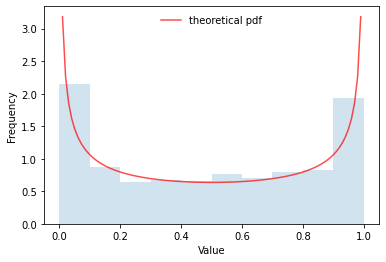

In [391]:
p,ax = plt.subplots()
ax.hist(sample,density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, dist.pdf(x),'r-', label='theoretical pdf', alpha=0.7)
ax.legend(loc='best', frameon=False)
plt.ylabel("Frequency")
plt.xlabel("Value")
plt.show()

Функция возвращающая выборку размера size выборочных средних из выборок размера n распределения dist.

In [392]:
def make_chosen_means(n,size,dist_l):
    means = []
    for i in range(size):
        sum = 0
        choise = dist_l.rvs(n)
        for j in range(n):
            sum+=choise[j]
        means.append(sum/n)
    return means

Аппроксимация выборками размера 2

In [393]:
chosen_means = make_chosen_means(2,1000,dist)

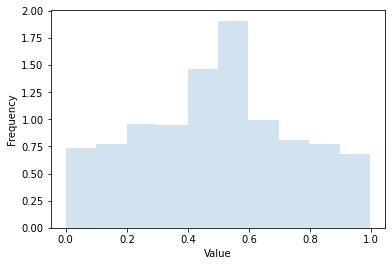

In [394]:
p,ax = plt.subplots()
ax.hist(chosen_means,density=True, histtype='stepfilled', alpha=0.2)
#ax.plot(x, sts.norm(x),'r-', label='theoretical pdf', alpha=0.7)
#ax.legend(loc='best', frameon=False)
plt.ylabel("Frequency")
plt.xlabel("Value")
plt.show()

Аппроксимация выборками размера 4

In [395]:
chosen_means = make_chosen_means(4,1000,dist)

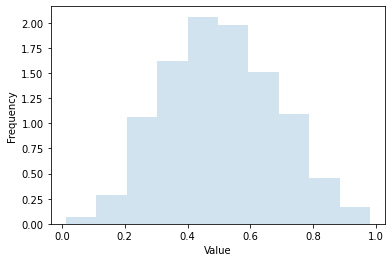

In [396]:
p,ax = plt.subplots()
ax.hist(chosen_means,density=True, histtype='stepfilled', alpha=0.2)
#ax.plot(x, sts.norm(x),'r-', label='theoretical pdf', alpha=0.7)
#ax.legend(loc='best', frameon=False)
plt.ylabel("Frequency")
plt.xlabel("Value")
plt.show()

Аппроксимация выборками размера 30

In [397]:
chosen_means = make_chosen_means(30,1000,dist)

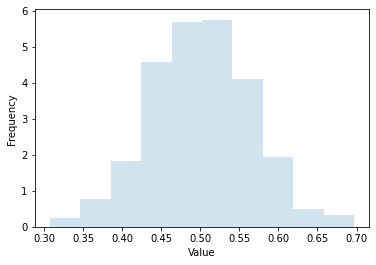

In [398]:
p,ax = plt.subplots()
ax.hist(chosen_means,density=True, histtype='stepfilled', alpha=0.2)
#ax.plot(x, sts.norm(x),'r-', label='theoretical pdf', alpha=0.7)
#ax.legend(loc='best', frameon=False)
plt.ylabel("Frequency")
plt.xlabel("Value")
plt.show()

Мат. ожидание бета распределения.
$$\mathbb{E[X]} = \alpha/(\alpha + \beta) = 0.5$$


Дисперсия бета распределения.
$$\mathbb{D[X] = \alpha\beta/(\alpha\beta)^2(\alpha + \beta 1) = 0.125}$$

Формула аппроксимации.
$$\mathbb{\bar{X}_n} \approx \mathbb{N(E[X],D[X]/n)}
$$

$$\Longrightarrow \mu = 0.5 ; \sigma^2 = 0.125/n
$$

Вычисление параметров нормального распределения, аппроксимирующего наше распределение, исходя из формулы выше

In [399]:
def norm_params(expectation,dispersion,n):
    return expectation , dispersion/n

In [400]:
chosen_means = make_chosen_means(2,1000,dist)
mu,sigma = norm_params(0.5,0.125,2)

Строим графики плотности нормального распределения, аппроксимирующие распределение выборочных средних (для каждого ранее выбранного n), показанное на гистограмме.

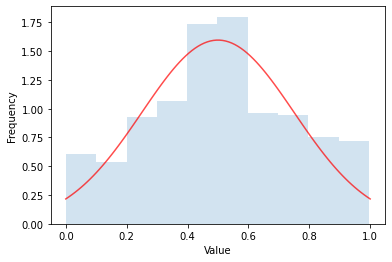

In [401]:

p,ax = plt.subplots()
ax.hist(chosen_means,density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, sts.norm.pdf(x,mu,math.sqrt(sigma)),'r-', label='theoretical pdf', alpha=0.7)
#ax.legend(loc='best', frameon=False)

plt.ylabel("Frequency")
plt.xlabel("Value")
plt.show()

In [402]:
chosen_means = make_chosen_means(4,1000,dist)
mu,sigma = norm_params(0.5,0.125,4)

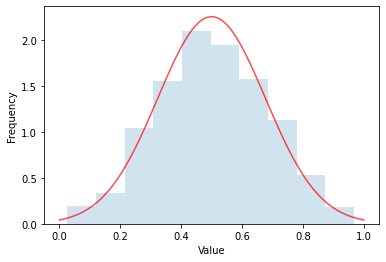

In [403]:

p,ax = plt.subplots()
ax.hist(chosen_means,density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, sts.norm.pdf(x,mu,math.sqrt(sigma)),'r-', label='theoretical pdf', alpha=0.7)
#ax.legend(loc='best', frameon=False)

plt.ylabel("Frequency")
plt.xlabel("Value")
plt.show()

In [404]:
chosen_means = make_chosen_means(30,1000,dist)
mu,sigma = norm_params(0.5,0.125,30)

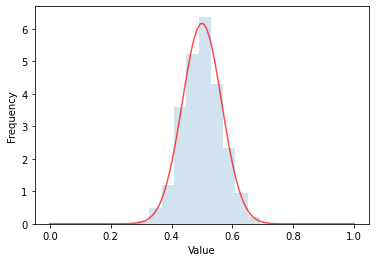

In [405]:

p,ax = plt.subplots()
ax.hist(chosen_means,density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, sts.norm.pdf(x,mu,math.sqrt(sigma)),'r-', label='theoretical pdf', alpha=0.7)
#ax.legend(loc='best', frameon=False)

plt.ylabel("Frequency")
plt.xlabel("Value")
plt.show()

Выводы:
1) Очевидно, что ЦПТ работает и плотность нормального распределения с параметрами $$ \mu$$ и $$\sigma$$, соответствующими N - размеру выборок при вычислении выборочных средних, хорошо аппроксимирует плотность  распределения выборочных средних, вычисленных на выборках имеющих отличное от нормального распределение.

2) В случае с рассматриваемым бета-распределением, достаточно хорошая аппроксимация наблюдается уже при n > 3, очевидно, что результат может варьироватся в зависимости от плотности распределения в  исходных выборках, и от приближенности плотности распределения в выборках к плотности нормального распределения.

3) Очевидно, что с увеличением N растет качетсво аппроксимации плотности распределения выборочных средних функцией плотности нормального распределения.